# Candlestick Rickshaw Man

https://www.investopedia.com/terms/r/rickshaw-man.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2016-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2.77,2.82,2.63,2.77,2.77,32516800
2016-01-05,2.77,2.80,2.64,2.75,2.75,12972300
2016-01-06,2.66,2.71,2.47,2.51,2.51,23759400
2016-01-07,2.43,2.48,2.26,2.28,2.28,22203500
2016-01-08,2.36,2.42,2.10,2.14,2.14,31822400


## Candlestick with Rickshaw Man

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,735967.0,2.77,2.82,2.63,2.77,2.77,32516800,False
1,735968.0,2.77,2.80,2.64,2.75,2.75,12972300,False
2,735969.0,2.66,2.71,2.47,2.51,2.51,23759400,False
3,735970.0,2.43,2.48,2.26,2.28,2.28,22203500,False
4,735971.0,2.36,2.42,2.10,2.14,2.14,31822400,False


Text(0, 0.5, 'Price')

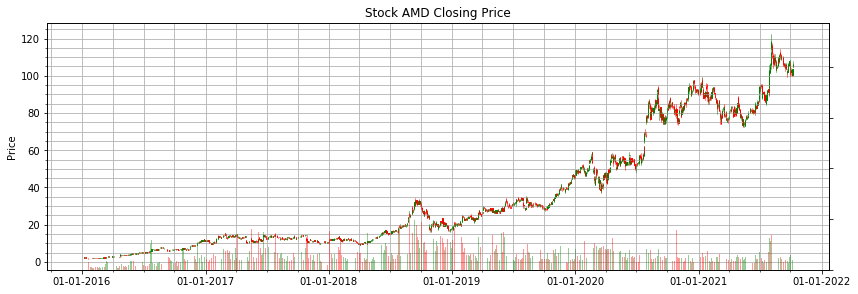

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
rickshaw_man = talib.CDLRICKSHAWMAN(df['Open'], df['High'], df['Low'], df['Close'])

rickshaw_man = rickshaw_man[rickshaw_man != 0]

In [6]:
df['rickshaw_man'] = talib.CDLRICKSHAWMAN(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['rickshaw_man'] !=0]

,Open,High,Low,Close,Adj Close,Volume,rickshaw_man
Date,,,,,,,
2016-02-09,1.890000,2.000000,1.850000,1.900000,1.900000,14991500,100
2016-03-31,2.840000,2.880000,2.800000,2.850000,2.850000,9071500,100
2016-04-04,2.830000,2.870000,2.800000,2.830000,2.830000,5591100,100
2016-04-05,2.760000,2.840000,2.720000,2.760000,2.760000,9640200,100
2016-04-11,2.760000,2.820000,2.740000,2.760000,2.760000,9045100,100
...,...,...,...,...,...,...,...
2021-08-11,107.599998,109.790001,105.620003,107.680000,107.680000,91788300,100
2021-08-19,103.320000,106.180000,101.980003,103.699997,103.699997,71117500,100
2021-08-25,108.129997,109.910004,107.449997,108.300003,108.300003,45485500,100


In [8]:
df['Adj Close'].loc[df['rickshaw_man'] !=0]

Date
2016-02-09      1.900000
2016-03-31      2.850000
2016-04-04      2.830000
2016-04-05      2.760000
2016-04-11      2.760000
                 ...    
2021-08-11    107.680000
2021-08-19    103.699997
2021-08-25    108.300003
2021-09-14    105.730003
2021-10-01    102.449997
Name: Adj Close, Length: 144, dtype: float64

In [9]:
df['Adj Close'].loc[df['rickshaw_man'] !=0].index

DatetimeIndex(['2016-02-09', '2016-03-31', '2016-04-04', '2016-04-05',
               '2016-04-11', '2016-06-03', '2016-06-14', '2016-06-15',
               '2016-07-01', '2016-07-14',
               ...
               '2021-05-24', '2021-06-07', '2021-06-23', '2021-07-13',
               '2021-07-26', '2021-08-11', '2021-08-19', '2021-08-25',
               '2021-09-14', '2021-10-01'],
              dtype='datetime64[ns]', name='Date', length=144, freq=None)

In [10]:
rickshaw_man

Date
2016-02-09    100
2016-03-31    100
2016-04-04    100
2016-04-05    100
2016-04-11    100
             ... 
2021-08-11    100
2021-08-19    100
2021-08-25    100
2021-09-14    100
2021-10-01    100
Length: 144, dtype: int32

In [11]:
rickshaw_man.index

DatetimeIndex(['2016-02-09', '2016-03-31', '2016-04-04', '2016-04-05',
               '2016-04-11', '2016-06-03', '2016-06-14', '2016-06-15',
               '2016-07-01', '2016-07-14',
               ...
               '2021-05-24', '2021-06-07', '2021-06-23', '2021-07-13',
               '2021-07-26', '2021-08-11', '2021-08-19', '2021-08-25',
               '2021-09-14', '2021-10-01'],
              dtype='datetime64[ns]', name='Date', length=144, freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,rickshaw_man
Date,,,,,,,
2016-01-04,2.770000,2.820000,2.630000,2.770000,2.770000,32516800,0
2016-01-05,2.770000,2.800000,2.640000,2.750000,2.750000,12972300,0
2016-01-06,2.660000,2.710000,2.470000,2.510000,2.510000,23759400,0
2016-01-07,2.430000,2.480000,2.260000,2.280000,2.280000,22203500,0
2016-01-08,2.360000,2.420000,2.100000,2.140000,2.140000,31822400,0
...,...,...,...,...,...,...,...
2021-10-01,102.599998,103.000000,100.639999,102.449997,102.449997,41491600,100
2021-10-04,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0
2021-10-05,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0


Text(0, 0.5, 'Price')

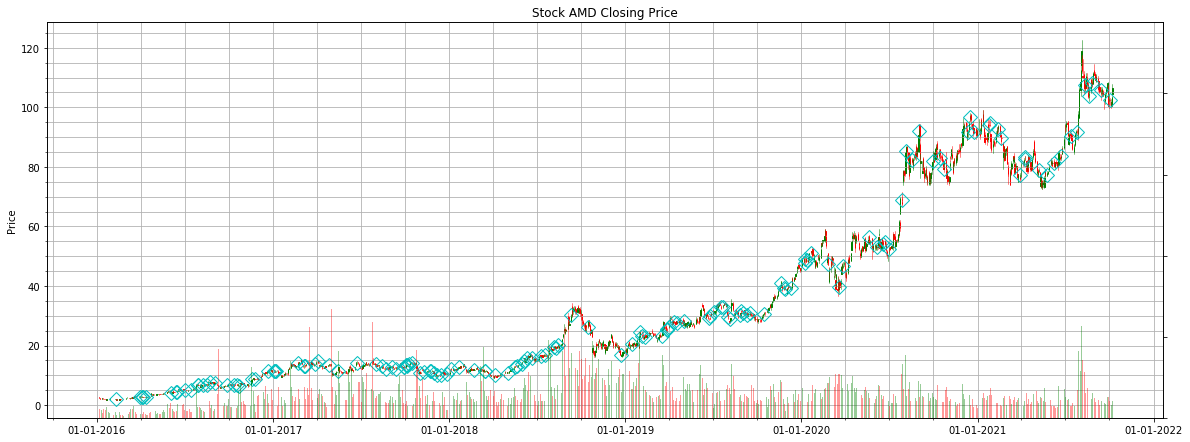

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['rickshaw_man'] !=0].index, df['Adj Close'].loc[df['rickshaw_man'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-09-01':'2021-09-30']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,rickshaw_man,VolumePositive
0,738034.0,111.300003,111.849998,109.849998,109.989998,109.989998,38579600,0,False
1,738035.0,110.320000,110.879997,108.769997,109.199997,109.199997,40090500,0,False
2,738036.0,108.849998,111.169998,108.500000,109.919998,109.919998,42605800,0,True
3,738040.0,109.959999,110.580002,108.660004,109.150002,109.150002,28815200,0,False
4,738041.0,108.879997,109.300003,105.519997,106.169998,106.169998,43067900,0,False


Text(0, 0.5, 'Price')

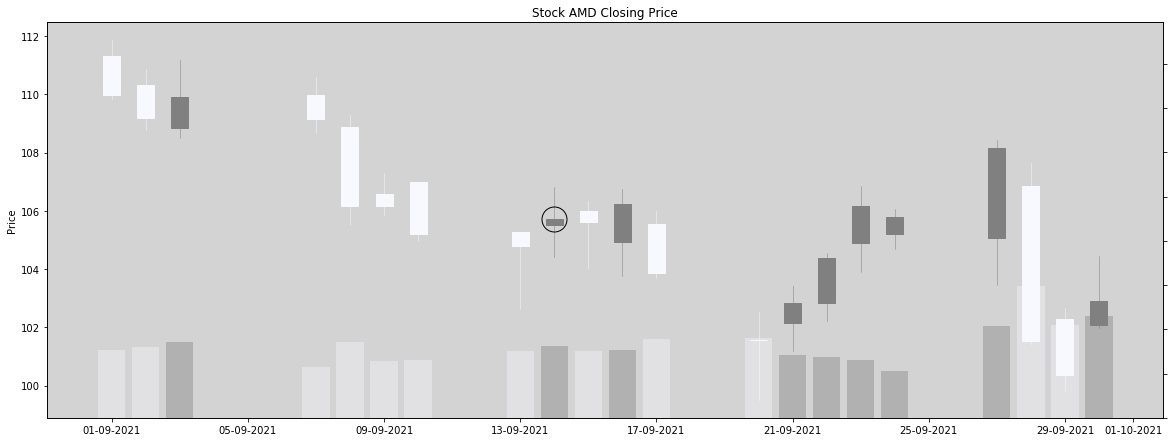

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('lightgrey')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='grey', colordown='ghostwhite', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['rickshaw_man'] !=0].index, df['Adj Close'].loc[df['rickshaw_man'] !=0],
                'ok', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'grey', False: 'ghostwhite'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

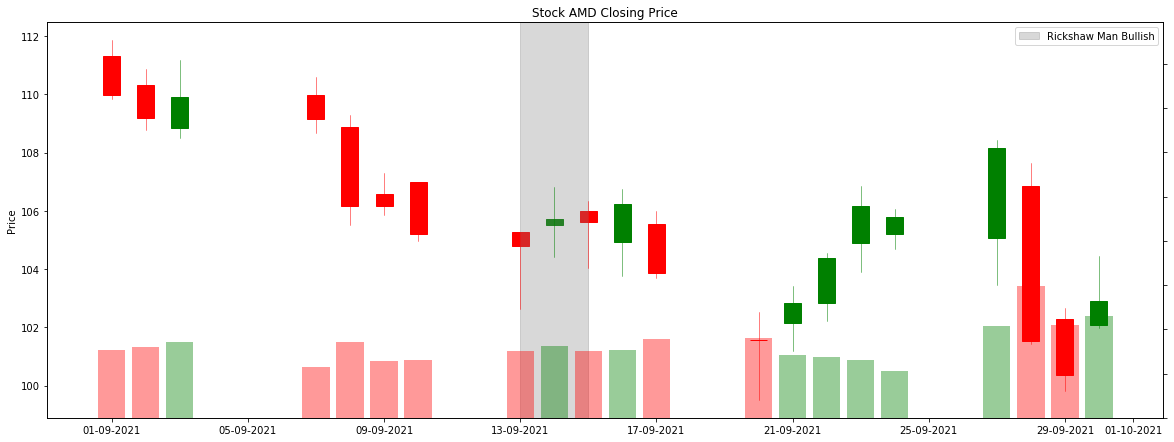

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,9,13)), date2num(datetime(2021,9,15)), 
           label="Rickshaw Man Bullish",color="grey", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')